In [10]:
!pip install kagglehub

In [11]:
import kagglehub
import os
import pandas as pd
import numpy as np


In [12]:
path = kagglehub.dataset_download("uciml/autompg-dataset")
print(path)


Using Colab cache for faster access to the 'autompg-dataset' dataset.
/kaggle/input/autompg-dataset


In [13]:
os.listdir(path)


['auto-mpg.csv']

In [14]:
csv_path = os.path.join(path, "auto-mpg.csv")
df = pd.read_csv(csv_path)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [16]:
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
#data cleaning
df = df.replace("?", np.nan)
df["horsepower"] = df["horsepower"].astype(float)


In [18]:
df.isna().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [19]:
df = df.dropna()


In [20]:
df = df.drop(columns=["car name"])


In [21]:
#feature engineering
#one hot
df["origin"] = df["origin"].map({
    1: "USA",
    2: "Europe",
    3: "Japan"
})


In [22]:
df = pd.get_dummies(df, columns=["origin"], drop_first=True)


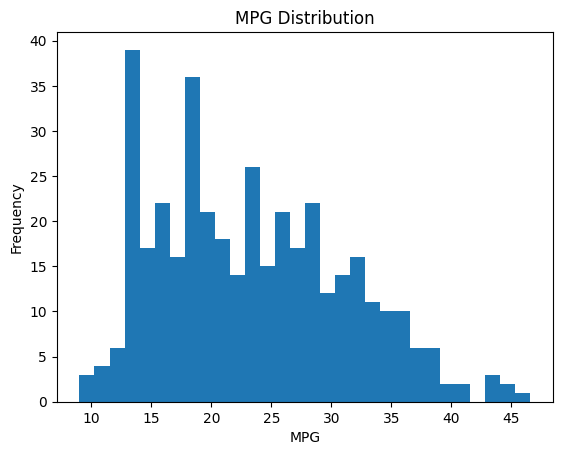

In [23]:
import matplotlib.pyplot as plt
plt.hist(df["mpg"], bins=30)
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.title("MPG Distribution")
plt.show()


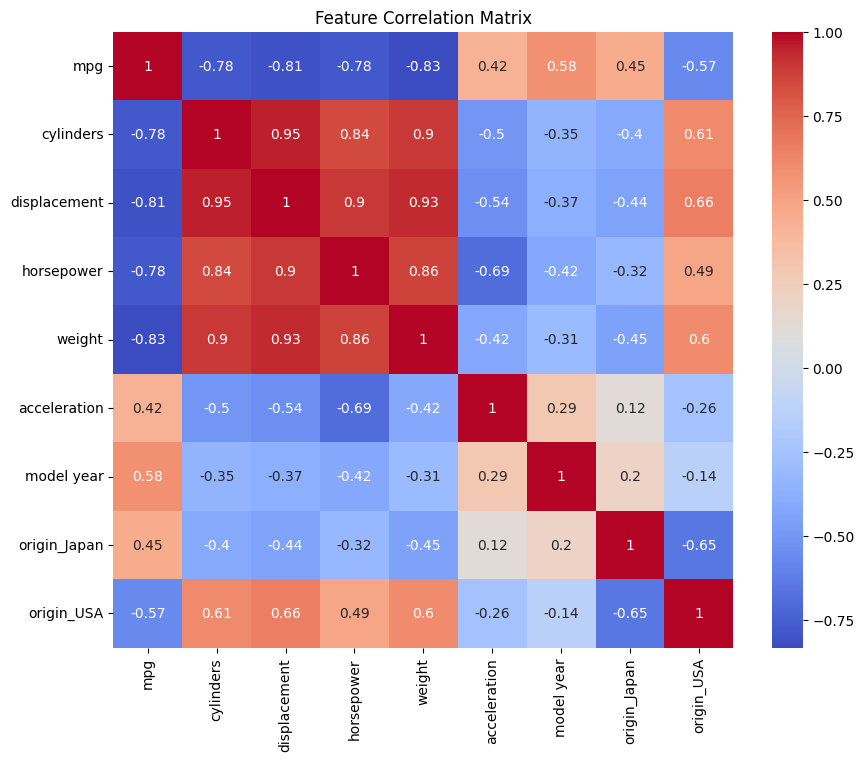

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


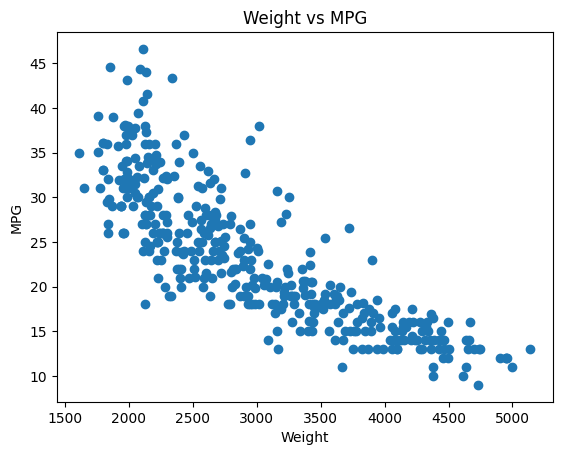

In [25]:
plt.scatter(df["weight"], df["mpg"])
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Weight vs MPG")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X = df.drop("mpg", axis=1)
y = df["mpg"]


In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [29]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [32]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [33]:
rf_preds = rf.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))


Random Forest MAE: 1.687440677966105


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [35]:
def build_model(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mae"]
    )
    return model


In [36]:
model = build_model(X_train_scaled.shape[1])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,009 (105.50 KB)

 Trainable params: 26,497 (103.50 KB)

 Non-trainable params: 512 (2.00 KB)

In [38]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 575.8433 - mae: 22.6972 - val_loss: 581.2786 - val_mae: 23.0055
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 441.1151 - mae: 20.1562 - val_loss: 547.4628 - val_mae: 22.3758
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 339.5740 - mae: 17.7126 - val_loss: 505.5193 - val_mae: 21.5522
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 248.9841 - mae: 15.1639 - val_loss: 455.5409 - val_mae: 20.5092
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 188.7374 - mae: 12.8198 - val_loss: 401.0176 - val_mae: 19.2882
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 112.6730 - mae: 9.6653 - val_loss: 346.3521 - val_mae: 17.9416
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 62.2502 - mae: 6.8563 - val_loss: 300.3286 - val_mae: 16.6986
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 39.9350 - mae: 5.3066 - val_loss: 266.0833 - val_mae: 15.7008
Epoch 9/300
9/9 ━━━━━━━━━━━━

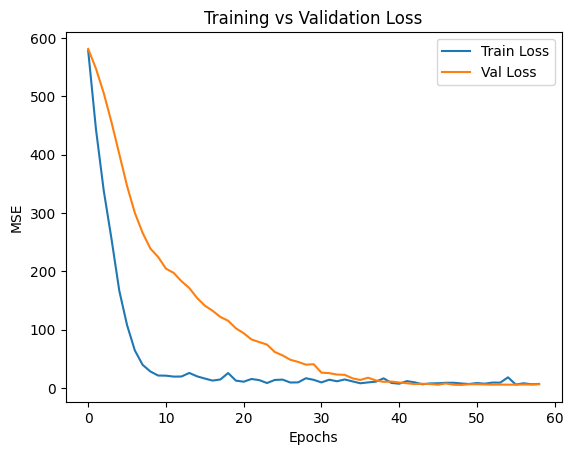

In [39]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [40]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print("Test MAE:", test_mae)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.2003 - mae: 1.9226
Test MAE: 1.9375786781311035


In [43]:
preds = model.predict(X_test_scaled).flatten()
preds.shape



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


(59,)

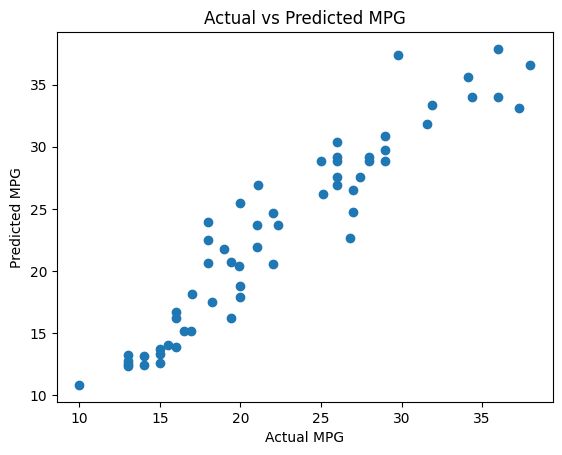

In [44]:
plt.scatter(y_test, preds)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()


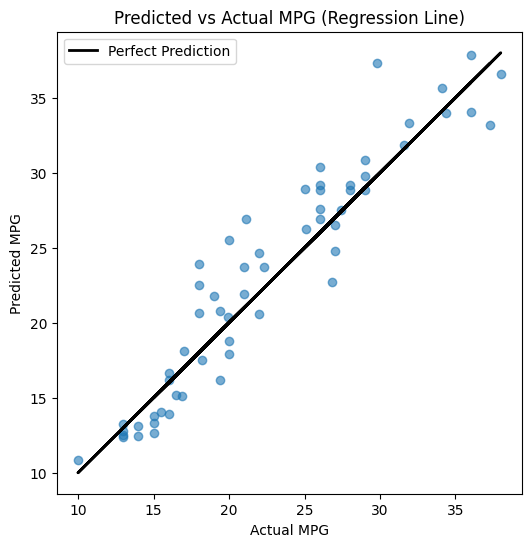

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, color="black", linewidth=2, label="Perfect Prediction")
plt.scatter(y_test, preds, alpha=0.6)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Predicted vs Actual MPG (Regression Line)")
plt.legend()
plt.show()
